In [1]:
import pandas as pd
import sys
sys.path.insert(0, '/10 A KAI 2/week11/Time_Series_Forecasting_for_Portfolio_Management')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
from script.ML_MODEL import TimeSeriesProcessor

In [3]:
# Example usage
file_path = './financial_data/TSLA.csv'  # Path to your CSV file
date_column = 'Date'  # Replace with the name of your date column
target_column = 'Close'  # Replace with the name of your target column

In [4]:
# Initialize the processor
processor = TimeSeriesProcessor(file_path, date_column, target_column)

In [5]:
# Load and prepare the data
processor.load_and_prepare_data()

### Trend Analaysis 

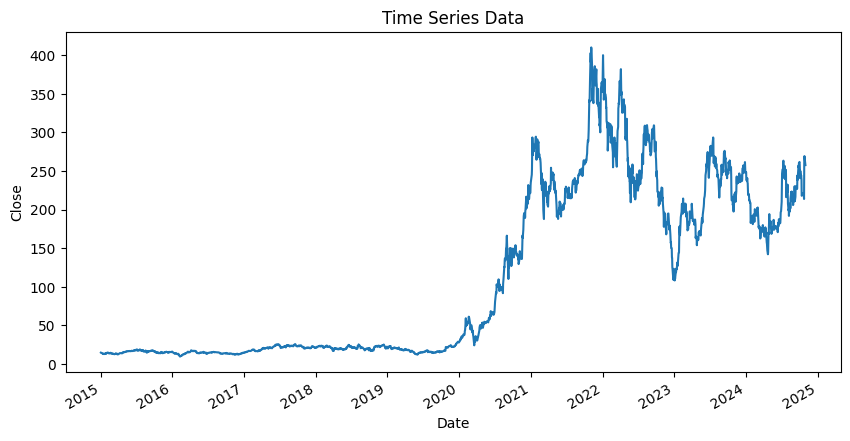

In [6]:
# Plot the time series
processor.plot_time_series()

In [7]:
# Check stationarity of the time series
p_value = processor.check_stationarity()
# Make the series stationary if necessary
if p_value > 0.05:
    processor.make_stationary()
    print("Time series has been differenced to achieve stationarity.")


ADF Statistic: -1.1507672706146044
p-value: 0.6944080657685303
Time series has been differenced to achieve stationarity.


### Plot the ACF and PACF

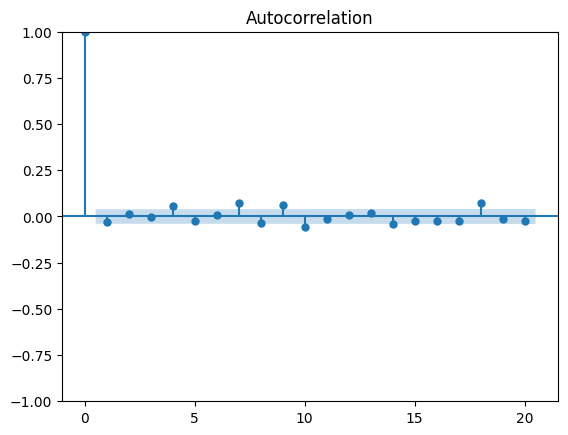

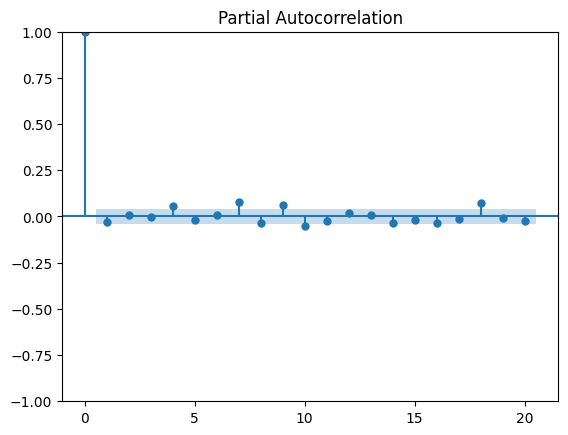

In [8]:
# Plot ACF and PACF
processor.plot_acf_pacf()

### Training and Test Split

In [9]:
# Split data into training and test sets
train_size = int(len(processor.time_series) * 0.8)
train, test = processor.time_series[:train_size], processor.time_series[train_size:]

### ARIMA model

In [10]:
# Fit ARIMA model
print("Fitting ARIMA model...")
processor.grid_search_arima(p_values=[0, 1, 2], d_values=[0, 1], q_values=[0, 1, 2])
forecast_arima = processor.evaluate_arima_sarima(test)

Fitting ARIMA model...


d:\10 A KAI 2\week11\Time_Series_Forecasting_for_Portfolio_Management\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\10 A KAI 2\week11\Time_Series_Forecasting_for_Portfolio_Management\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\10 A KAI 2\week11\Time_Series_Forecasting_for_Portfolio_Management\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\10 A KAI 2\week11\Time_Series_Forecasting_for_Portfolio_Management\myenv\Lib\site-pac

Best ARIMA order: (1, 1, 0) with AIC: 15827.423504326607
ARIMA/SARIMA - Mean Absolute Error (MAE): 51.77594882953648
ARIMA/SARIMA - Root Mean Squared Error (RMSE): 62.90960440143107


d:\10 A KAI 2\week11\Time_Series_Forecasting_for_Portfolio_Management\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\10 A KAI 2\week11\Time_Series_Forecasting_for_Portfolio_Management\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


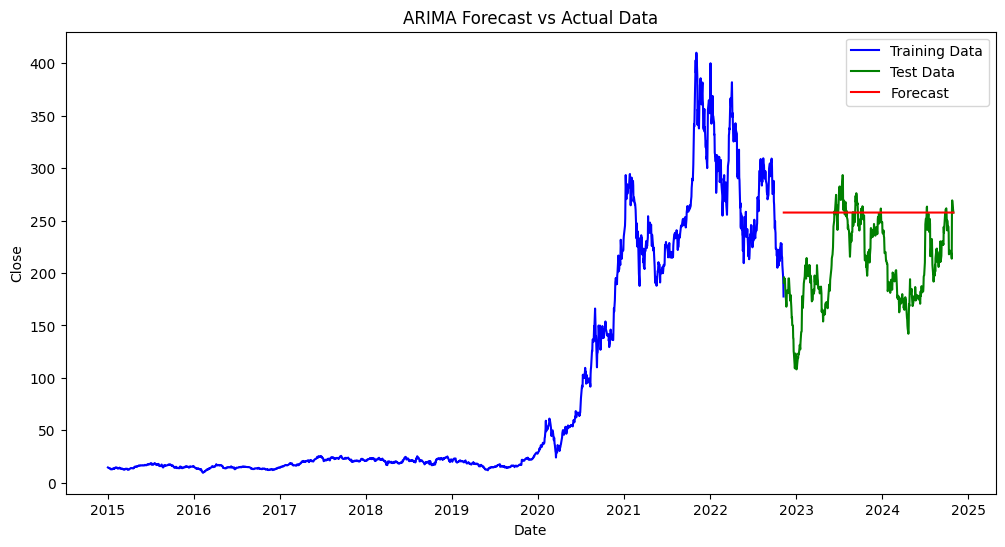

In [11]:
# Plot ARIMA results
processor.plot_results(train, test, forecast_arima, 'ARIMA')

### SARIMA Model

In [16]:
# Fit SARIMA model
print("Fitting SARIMA model...")
processor.grid_search_sarima(
    p_values=[0, 1, 2],
    d_values=[0, 1],
    q_values=[0, 1, 2],
    seasonal_p=[0, 1],
    seasonal_d=[0, 1],
    seasonal_q=[0, 1],
    s=6
)
forecast_sarima = processor.evaluate_arima_sarima(test)

Fitting SARIMA model...


d:\10 A KAI 2\week11\Time_Series_Forecasting_for_Portfolio_Management\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\10 A KAI 2\week11\Time_Series_Forecasting_for_Portfolio_Management\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\10 A KAI 2\week11\Time_Series_Forecasting_for_Portfolio_Management\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\10 A KAI 2\week11\Time_Series_Forecasting_for_Portfolio_Management\myenv\Lib\site-pac

Best SARIMA order: (1, 1, 0) with seasonal order: (1, 0, 1, 6) and AIC: 15822.504409957686
ARIMA/SARIMA - Mean Absolute Error (MAE): 56.46305294632207
ARIMA/SARIMA - Root Mean Squared Error (RMSE): 67.31702741835178


d:\10 A KAI 2\week11\Time_Series_Forecasting_for_Portfolio_Management\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\10 A KAI 2\week11\Time_Series_Forecasting_for_Portfolio_Management\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


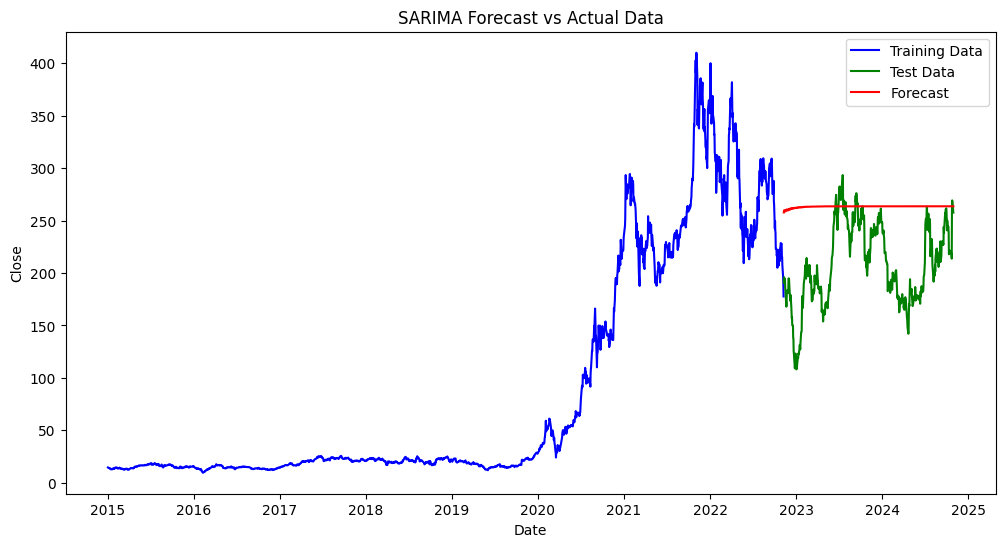

In [18]:
# Plot SARIMA results
processor.plot_results(train, test, forecast_sarima, 'SARIMA')

### LSTM Model

In [14]:
# Fit LSTM model
print("Fitting LSTM model...")
processor.fit_lstm(train, n_steps=60, epochs=10, batch_size=32)
forecast_lstm = processor.evaluate_lstm(train, test)

Fitting LSTM model...


d:\10 A KAI 2\week11\Time_Series_Forecasting_for_Portfolio_Management\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - loss: 0.0273
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0012
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 9.2674e-04
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 8.2466e-04
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 7.8213e-04
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 7.8707e-04
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.8556e-04
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 6.6455e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 6.4070e-04
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 7.1764e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
LSTM - Mean Absolute Error (MAE): 10.864717733980429
LSTM - Root Mean Squared Error (RMSE): 14.180302077440922


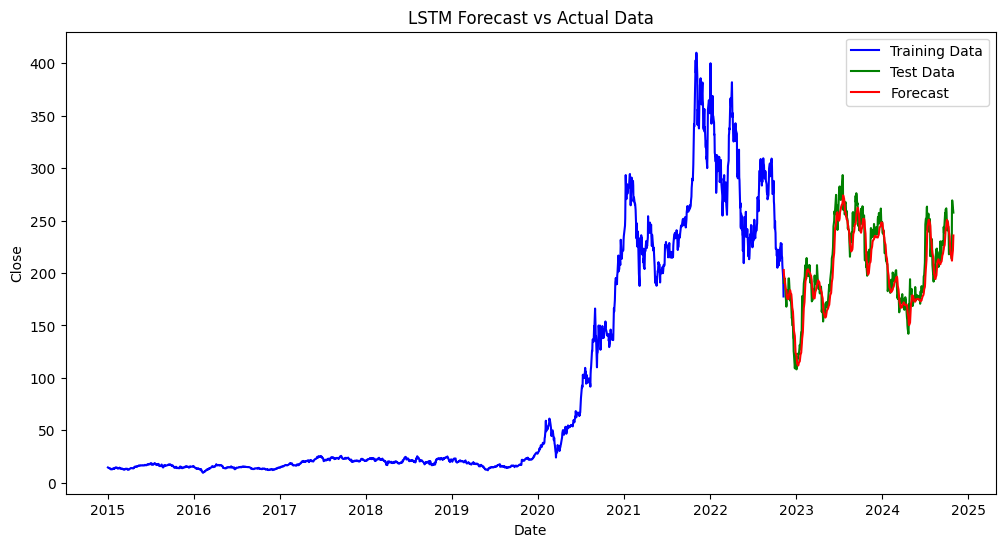

In [15]:
# Plot LSTM results
processor.plot_results(train, test, forecast_lstm, 'LSTM')